# **Data Preparation**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"chintyaa27","key":"879f299bd4fd432e109c4c1496021ea0"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download xhlulu/140k-real-and-fake-faces

Dataset URL: https://www.kaggle.com/datasets/xhlulu/140k-real-and-fake-faces
License(s): other
100% 3.75G/3.75G [00:36<00:00, 198MB/s]
100% 3.75G/3.75G [00:36<00:00, 110MB/s]


In [ ]:
!unzip 140k-real-and-fake-faces.zip

Streaming output truncated to the last 5000 lines.
  inflating: real_vs_fake/real-vs-fake/valid/real/34832.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34836.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34839.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34847.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34848.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34852.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34861.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34864.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34868.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34877.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34883.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34887.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34891.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34894.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34904.jpg  
  inflating: real_v

In [ ]:
!unzip "/content/drive/MyDrive/Semester 8/Computer Vision/Project/train_splits.zip" -d "/content"

Streaming output truncated to the last 5000 lines.
  inflating: /content/train_splits/train_split_9/fake/00JC8ESFO5.jpg  
  inflating: /content/train_splits/train_split_9/fake/01HUIAWIOM.jpg  
  inflating: /content/train_splits/train_split_9/fake/02W237BTME.jpg  
  inflating: /content/train_splits/train_split_9/fake/03OOX8FLWL.jpg  
  inflating: /content/train_splits/train_split_9/fake/03V610BW4W.jpg  
  inflating: /content/train_splits/train_split_9/fake/049ES270TP.jpg  
  inflating: /content/train_splits/train_split_9/fake/04Y0Q97DMO.jpg  
  inflating: /content/train_splits/train_split_9/fake/058KLRF8OA.jpg  
  inflating: /content/train_splits/train_split_9/fake/059N623UMG.jpg  
  inflating: /content/train_splits/train_split_9/fake/05LCWAXDQZ.jpg  
  inflating: /content/train_splits/train_split_9/fake/0675YCJL7W.jpg  
  inflating: /content/train_splits/train_split_9/fake/06ZO5D5OG0.jpg  
  inflating: /content/train_splits/train_split_9/fake/07PYE076Y6.jpg  
  inflating: /content/trai

In [ ]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image

# **Simple EDA**

In [ ]:
main_path = "/content/real-vs-fake"

images_df = {
  "split": [],
  "image_path": [],
  "label": []
}

for split_folder in os.listdir(main_path):
  split_path = os.path.join(main_path, split_folder)
  for label in os.listdir(split_path):
    label_path = os.path.join(split_path, label)
    for img_path in glob.glob(label_path + "/*.jpg"):
      images_df["split"].append(split_folder)
      images_df["image_path"].append(img_path)
      images_df["label"].append(label)

images_df = pd.DataFrame(images_df)

In [ ]:
images_df.head()

,split,image_path,label
0,test,/content/real-vs-fake/test/fake/IO9BJLUKGN.jpg,fake
1,test,/content/real-vs-fake/test/fake/K52QY04XPF.jpg,fake
2,test,/content/real-vs-fake/test/fake/Q5E0CMRA9X.jpg,fake
3,test,/content/real-vs-fake/test/fake/DJNC9RCB13.jpg,fake
4,test,/content/real-vs-fake/test/fake/JQC7LT311U.jpg,fake


In [ ]:
real_grouped_df = images_df[images_df['label'] == "real"].groupby('split')
fake_grouped_df = images_df[images_df['label'] == "fake"].groupby('split')

In [ ]:
real_grouped_df.size()

,0
split,
test,10000
train,50000
valid,10000


In [ ]:
fake_grouped_df.size()

,0
split,
test,10000
train,50000
valid,10000


In [ ]:
import matplotlib.pyplot as plt
import cv2

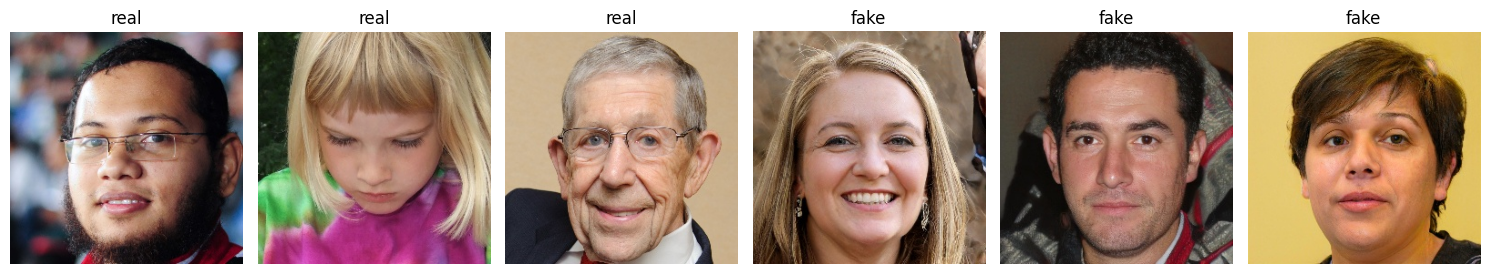

In [ ]:
real_imgs = images_df[images_df['label'] == 'real'].sample(3, random_state=1)
fake_imgs = images_df[images_df['label'] == 'fake'].sample(3, random_state=1)

combined = pd.concat([real_imgs, fake_imgs]).reset_index(drop=True)

plt.figure(figsize=(15, 5))
for i in range(6):
  img = cv2.imread(combined.loc[i, "image_path"])
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  label = combined.loc[i, "label"]

  plt.subplot(1, 6, i+1)
  plt.imshow(img)
  plt.title(label)
  plt.axis("off")

plt.tight_layout()
plt.show()


<Axes: xlabel='split', ylabel='count'>

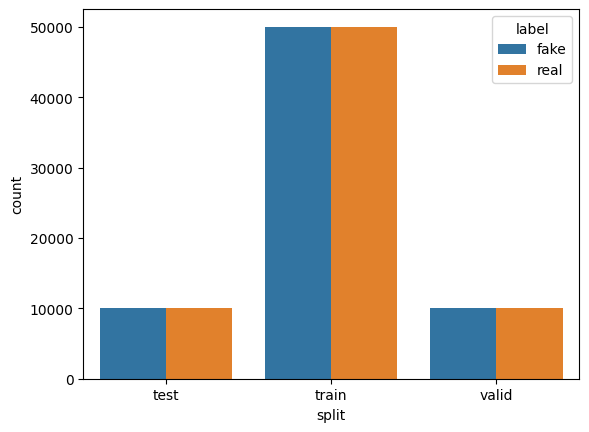

In [ ]:
import seaborn as sns

sns.countplot(data=images_df, x="split", hue="label")

In [ ]:
def get_image_size_cv2(path):
  img = cv2.imread(path)
  if img is None:
      return (0, 0)  # Untuk handle error file corrupt
  height, width, _ = img.shape
  return (width, height)

images_df["size"] = images_df["image_path"].apply(get_image_size_cv2)

In [ ]:
images_df["size"].value_counts()

,count
size,
"(256, 256)",140000


In [ ]:
import numpy as np

def get_avg_rgb(path):
    img = cv2.imread(path)  # OpenCV baca gambar dalam format BGR
    if img is None:
        return (0, 0, 0)  # Error handling jika gambar tidak terbaca
    avg = img.mean(axis=(0, 1))  # Hitung rata-rata tiap channel warna
    return (avg[2], avg[1], avg[0])  # Balik dari BGR ke RGB

In [ ]:
images_df[["r", "g", "b"]] = images_df["image_path"].apply(
  lambda x: pd.Series(get_avg_rgb(x))
)

images_df.head()

,split,image_path,label,size,r,g,b
0,test,/content/real-vs-fake/test/fake/IO9BJLUKGN.jpg,fake,"(256, 256)",92.714935,68.118942,79.131256
1,test,/content/real-vs-fake/test/fake/K52QY04XPF.jpg,fake,"(256, 256)",164.195526,142.765244,150.216507
2,test,/content/real-vs-fake/test/fake/Q5E0CMRA9X.jpg,fake,"(256, 256)",112.358978,78.862839,62.745209
3,test,/content/real-vs-fake/test/fake/DJNC9RCB13.jpg,fake,"(256, 256)",134.434906,99.582108,92.497375
4,test,/content/real-vs-fake/test/fake/JQC7LT311U.jpg,fake,"(256, 256)",151.524185,132.033798,114.625534


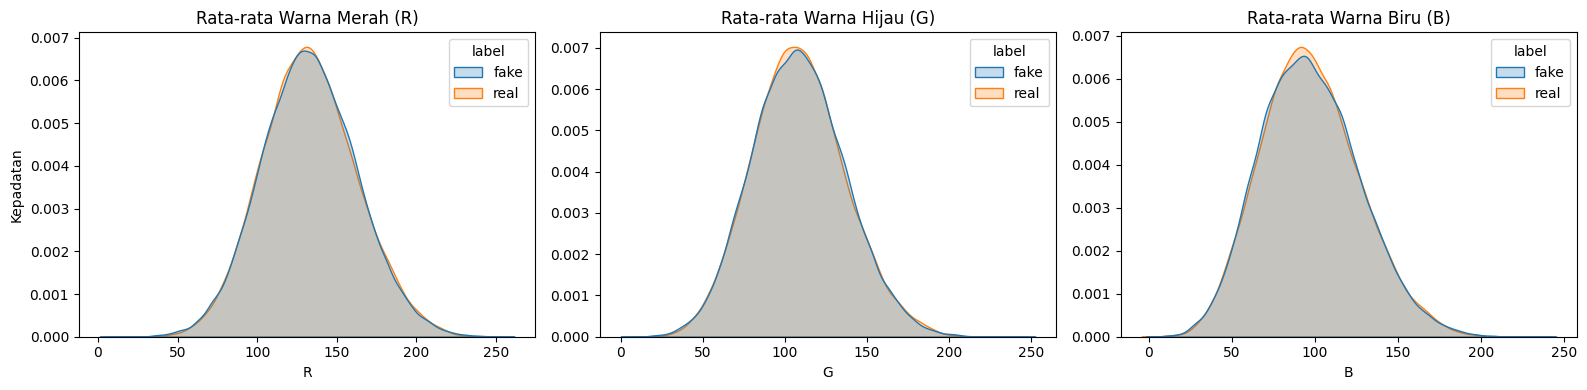

In [ ]:
plt.figure(figsize=(16, 4))

# R
plt.subplot(1, 3, 1)
sns.kdeplot(data=images_df, x="r", hue="label", fill=True)
plt.title("Rata-rata Warna Merah (R)")
plt.xlabel("R")
plt.ylabel("Kepadatan")

# G
plt.subplot(1, 3, 2)
sns.kdeplot(data=images_df, x="g", hue="label", fill=True)
plt.title("Rata-rata Warna Hijau (G)")
plt.xlabel("G")
plt.ylabel("")

# B
plt.subplot(1, 3, 3)
sns.kdeplot(data=images_df, x="b", hue="label", fill=True)
plt.title("Rata-rata Warna Biru (B)")
plt.xlabel("B")
plt.ylabel("")

plt.tight_layout()
plt.show()


In [ ]:
def get_brightness_contrast(path):
  img = cv2.imread(path)
  if img is None:
      return (0, 0)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert ke grayscale
  brightness = gray.mean()      # rata-rata intensitas pixel (brightness)
  contrast = gray.std()         # standar deviasi pixel (kontras)
  return brightness, contrast


In [ ]:
images_df[["brightness", "contrast"]] = images_df["image_path"].apply(
  lambda x: pd.Series(get_brightness_contrast(x))
)

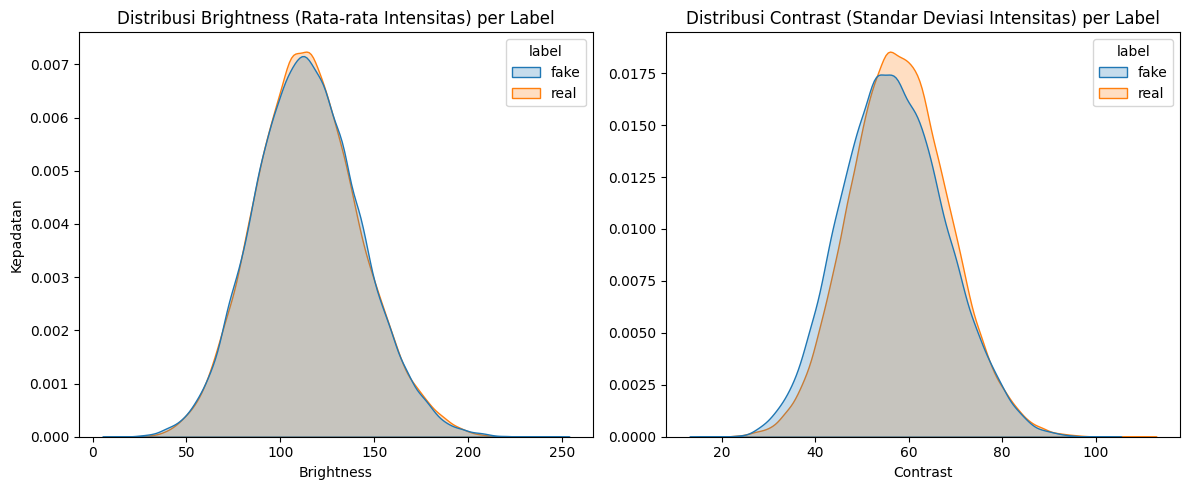

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.kdeplot(data=images_df, x="brightness", hue="label", fill=True)
plt.title("Distribusi Brightness (Rata-rata Intensitas) per Label")
plt.xlabel("Brightness")
plt.ylabel("Kepadatan")

plt.subplot(1, 2, 2)
sns.kdeplot(data=images_df, x="contrast", hue="label", fill=True)
plt.title("Distribusi Contrast (Standar Deviasi Intensitas) per Label")
plt.xlabel("Contrast")
plt.ylabel("")

plt.tight_layout()
plt.show()


In [ ]:
def get_edges(path, low_threshold=100, high_threshold=200):
  img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)  # langsung grayscale
  edges = cv2.Canny(img, low_threshold, high_threshold)
  return edges


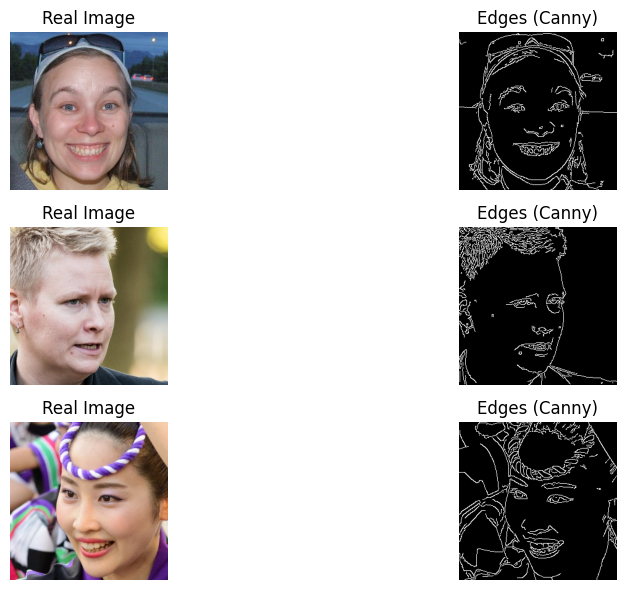

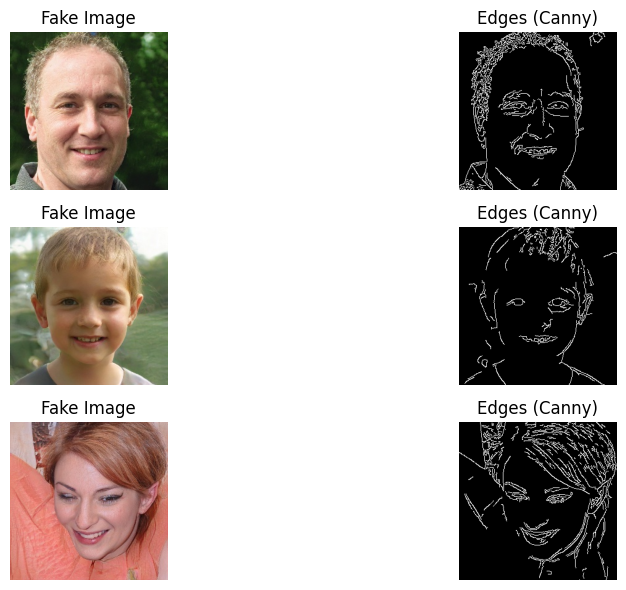

In [ ]:
def show_edge_samples(df, label, n=3):
  samples = df[df['label'] == label].sample(n)

  plt.figure(figsize=(12, 6))

  for i, (_, row) in enumerate(samples.iterrows()):
    img_path = row['image_path']
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    edges = get_edges(img_path)

    # Tampilkan gambar asli
    plt.subplot(n, 2, 2*i + 1)
    plt.imshow(img_rgb)
    plt.title(f"{label.capitalize()} Image")
    plt.axis('off')

    # Tampilkan hasil edge
    plt.subplot(n, 2, 2*i + 2)
    plt.imshow(edges, cmap='gray')
    plt.title("Edges (Canny)")
    plt.axis('off')

  plt.tight_layout()
  plt.show()

# Contoh panggil untuk real dan fake
show_edge_samples(images_df, label="real", n=3)
show_edge_samples(images_df, label="fake", n=3)

In [ ]:
def get_saturation_value(path):
  img = cv2.imread(path)
  hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
  s = hsv[:,:,1].mean()  # rata-rata Saturation
  v = hsv[:,:,2].mean()  # rata-rata Value (brightness)
  return s, v

In [ ]:
images_df[["saturation", "value"]] = images_df["image_path"].apply(
  lambda x: pd.Series(get_saturation_value(x))
)

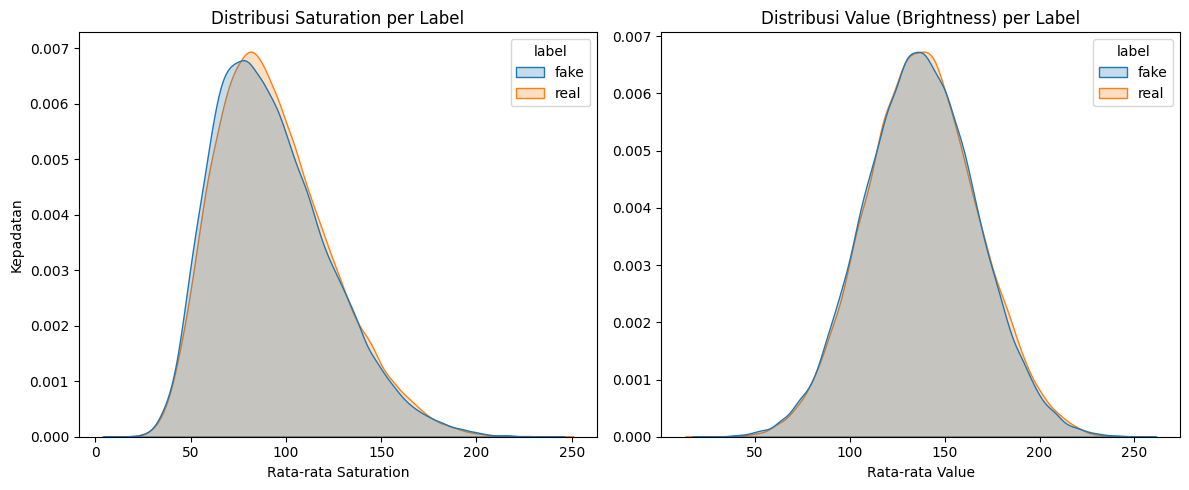

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.kdeplot(data=images_df, x="saturation", hue="label", fill=True)
plt.title("Distribusi Saturation per Label")
plt.xlabel("Rata-rata Saturation")
plt.ylabel("Kepadatan")

plt.subplot(1,2,2)
sns.kdeplot(data=images_df, x="value", hue="label", fill=True)
plt.title("Distribusi Value (Brightness) per Label")
plt.xlabel("Rata-rata Value")
plt.ylabel("")

plt.tight_layout()
plt.show()

In [ ]:
images_df.head()

,split,image_path,label,size,r,g,b,brightness,contrast,saturation,value
0,test,/content/real-vs-fake/test/fake/IO9BJLUKGN.jpg,fake,"(256, 256)",92.714935,68.118942,79.131256,76.767715,46.109690,133.707901,114.635437
1,test,/content/real-vs-fake/test/fake/K52QY04XPF.jpg,fake,"(256, 256)",164.195526,142.765244,150.216507,150.025513,48.686315,50.257446,168.709076
2,test,/content/real-vs-fake/test/fake/Q5E0CMRA9X.jpg,fake,"(256, 256)",112.358978,78.862839,62.745209,87.047913,57.162027,135.520355,112.361908
3,test,/content/real-vs-fake/test/fake/DJNC9RCB13.jpg,fake,"(256, 256)",134.434906,99.582108,92.497375,109.198135,56.014364,125.559570,144.584427
4,test,/content/real-vs-fake/test/fake/JQC7LT311U.jpg,fake,"(256, 256)",151.524185,132.033798,114.625534,135.884766,50.765471,70.014679,151.937408


# **Modeling & Evaluation**

## **Transfer Learning: Feature Extraction**

In [ ]:
train_dir = '/content/real-vs-fake/train'
valid_dir = '/content/real-vs-fake/valid'
test_dir  = '/content/real-vs-fake/test'

train_datagen = ImageDataGenerator(
  preprocessing_function=preprocess_input,
  horizontal_flip=True
)
valid_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen  = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
  train_dir,
  target_size=(299, 299),
  batch_size=32,
  class_mode='binary'
)

valid_generator = valid_datagen.flow_from_directory(
  valid_dir,
  target_size=(299, 299),
  batch_size=32,
  class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
  test_dir,
  target_size=(299, 299),
  batch_size=32,
  class_mode='binary',
  shuffle=False
)

Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


In [ ]:
base_model = Xception(weights='imagenet', include_top=False, input_shape=(299, 299, 3))
base_model.trainable = False  # Bekukan base Xception

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1, activation='sigmoid')(x)  # Binary classification

model = Model(inputs=base_model.input, outputs=x)

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])


83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
history = model.fit(
  train_generator,
  validation_data=valid_generator,
  epochs=10
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 1028s 322ms/step - accuracy: 0.6827 - loss: 0.5989 - val_accuracy: 0.7583 - val_loss: 0.5056
Epoch 2/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 1045s 334ms/step - accuracy: 0.7650 - loss: 0.4971 - val_accuracy: 0.7829 - val_loss: 0.4677
Epoch 3/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 1010s 323ms/step - accuracy: 0.7876 - loss: 0.4636 - val_accuracy: 0.7951 - val_loss: 0.4465
Epoch 4/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 1008s 323ms/step - accuracy: 0.7986 - loss: 0.4454 - val_accuracy: 0.8033 - val_loss: 0.4318
Epoch 5/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 1008s 323ms/step - accuracy: 0.8050 - loss: 0.4316 - val_accuracy: 0.8086 - val_loss: 0.4223
Epoch 6/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 1009s 323ms/step - accuracy: 0.8143 - loss: 0.4185 - val_accuracy: 0.8163 - val_loss: 0.4115
Epoch 7/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 1009s 323ms/step - accuracy: 0.8192 - loss: 0.4113 - val_accuracy: 0.8198 - val_loss: 0.4039
Epoch 8/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 1009s 323ms/s

In [ ]:
model.save('xception_train100k_model.h5')

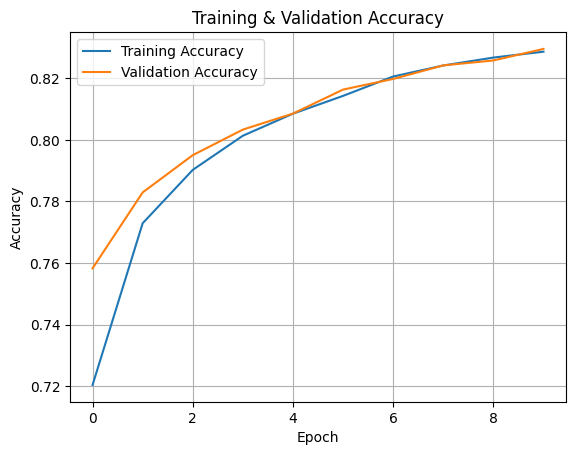

In [ ]:
# Ambil data dari history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


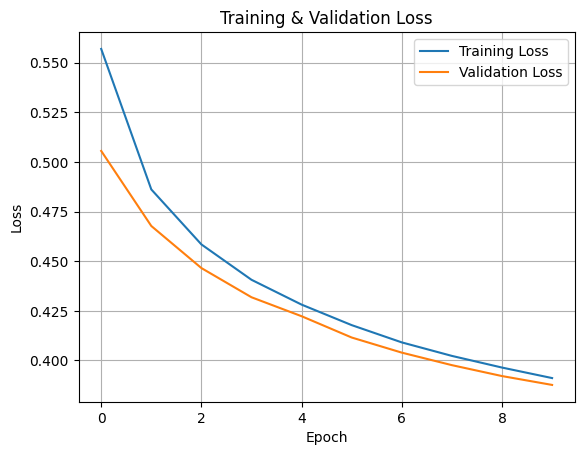

In [ ]:
# Ambil data dari history
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


## **Transfer Learning: Fine Tuning**

In [ ]:
from tensorflow.keras.layers import Dropout
from sklearn.metrics import classification_report, confusion_matrix

train_dir = '/content/real-vs-fake/train'
valid_dir = '/content/real-vs-fake/valid'
test_dir  = '/content/real-vs-fake/test'

train_datagen = ImageDataGenerator(
  preprocessing_function=preprocess_input,
  horizontal_flip=True,
  rotation_range=20,
  zoom_range=0.2,
  width_shift_range=0.2,
  height_shift_range=0.2,
)
valid_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen  = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
  train_dir,
  target_size=(299, 299),
  batch_size=32,
  class_mode='binary'
)

valid_generator = valid_datagen.flow_from_directory(
  valid_dir,
  target_size=(299, 299),
  batch_size=32,
  class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
  test_dir,
  target_size=(299, 299),
  batch_size=32,
  class_mode='binary',
  shuffle=False
)

Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


In [ ]:
base_model = Xception(weights='imagenet', include_top=False, input_shape=(299, 299, 3))
base_model.trainable = True

# Bekukan semua layer kecuali 30 terakhir
for layer in base_model.layers[:-30]:
  layer.trainable = False

# Tambah classifier head
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=output)

# Compile
model.compile(
  optimizer=Adam(learning_rate=1e-4),
  loss='binary_crossentropy',
  metrics=['accuracy']
)

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Callback untuk menghentikan training jika val_loss tidak membaik selama 3 epoch
early_stopping = EarlyStopping(
  monitor='val_loss',
  patience=3,
  restore_best_weights=True
)

In [ ]:
history = model.fit(
  train_generator,
  validation_data=valid_generator,
  epochs=5,
  callbacks=[early_stopping]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2657s 840ms/step - accuracy: 0.8815 - loss: 0.2618 - val_accuracy: 0.9865 - val_loss: 0.0378
Epoch 2/5
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2565s 821ms/step - accuracy: 0.9719 - loss: 0.0757 - val_accuracy: 0.9918 - val_loss: 0.0243
Epoch 3/5
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2569s 822ms/step - accuracy: 0.9811 - loss: 0.0527 - val_accuracy: 0.9930 - val_loss: 0.0204
Epoch 4/5
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2564s 821ms/step - accuracy: 0.9869 - loss: 0.0365 - val_accuracy: 0.9937 - val_loss: 0.0200
Epoch 5/5
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2562s 820ms/step - accuracy: 0.9888 - loss: 0.0318 - val_accuracy: 0.9948 - val_loss: 0.0156


In [ ]:
model.save('model-fine-tune.h5')

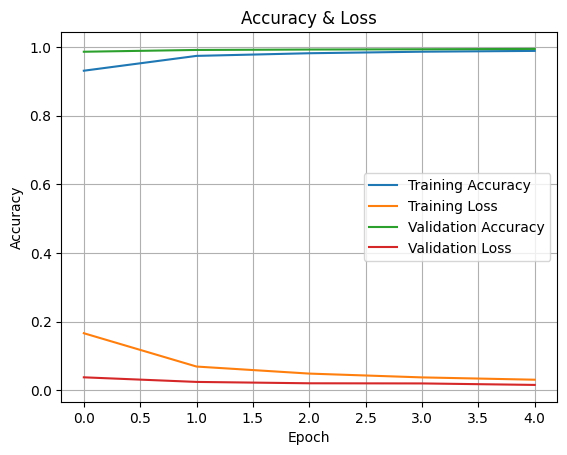

In [ ]:
# Ambil data dari history
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

# Plot
plt.plot(acc, label='Training Accuracy')
plt.plot(loss, label='Training Loss')
plt.plot(val_acc, label='Validation Accuracy')
plt.plot(val_loss, label='Validation Loss')
plt.title('Accuracy & Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Predict di test set
test_generator.reset()
predictions = model.predict(test_generator)
y_pred = (predictions > 0.5).astype(int).flatten()
y_true = test_generator.classes

# Evaluasi
print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices))

625/625 ━━━━━━━━━━━━━━━━━━━━ 161s 253ms/step
Confusion Matrix:
[[9919   81]
 [  30 9970]]

Classification Report:
              precision    recall  f1-score   support

        fake       1.00      0.99      0.99     10000
        real       0.99      1.00      0.99     10000

    accuracy                           0.99     20000
   macro avg       0.99      0.99      0.99     20000
weighted avg       0.99      0.99      0.99     20000



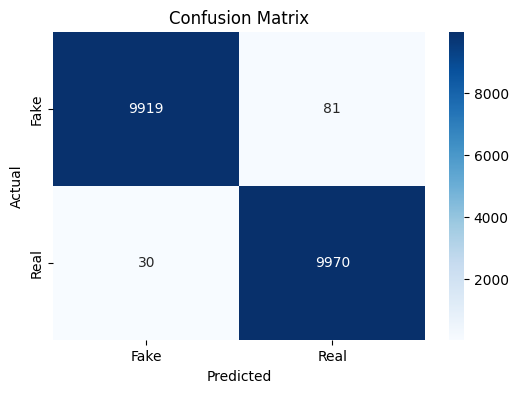

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 3. Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# 4. Visualisasi Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# **Testing**

In [ ]:
class_labels = test_generator.class_indices
print(class_labels)


{'fake': 0, 'real': 1}


In [ ]:
model = tf.keras.models.load_model('model-xception.h5')

In [ ]:
img_path = '/content/test2.jpeg'  # ganti dengan path gambar
img = image.load_img(img_path, target_size=(299, 299))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

plt.imshow(img)
plt.axis('off')  # sembunyikan axis
plt.show()

In [ ]:
prediction = model.predict(img_array)
predicted_label = 'real' if prediction[0][0] > 0.5 else 'fake'
print(f"Prediksi: {predicted_label} (probabilitas: {prediction[0][0]:.4f})")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Prediksi: real (probabilitas: 1.0000)
